In [5]:
!pip install -q -q -q pointpats
!pip install -q -q -q geopandas

In [105]:
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
%matplotlib inline
import numpy as np
from shapely.geometry import Polygon, Point
import pandas as pd
import matplotlib.pyplot as plt

define the window

In [45]:
window = Window([[(0,0), (0,1), (1,1), (1,0) ]])

Totaly random point set

In [55]:
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1)
rset = pd.DataFrame(samples.realizations[0])
rset.columns = ['x', 'y']

In [58]:
rset.head(2)

,x,y
0,0.221993,0.347729
1,0.870732,0.012848


Clustered point set

In [82]:
np.random.seed(9)
csamples = PoissonClusterPointProcess(window, 200, 4, 0.1, 1)
cset = pd.DataFrame(csamples.realizations[0])
cset.columns = ['x', 'y']

Uniform

In [88]:
pas = (1 / 200**0.5)

In [103]:
x = np.arange(0, 1, pas) 
uset = pd.DataFrame(np.transpose([np.tile(x, len(x)), np.repeat(x, len(x))]))
uset.columns = ['x', 'y']
uset.x = uset.x + 0.03
uset.y = uset.y + 0.03
uset = uset[(uset.x<1)&(uset.y<1)]

Plot 

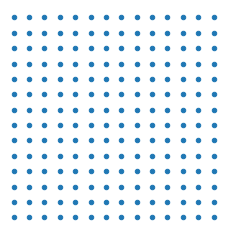

In [117]:
ax = uset.plot.scatter('x', 'y')
ax.set_axis_off()
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')
plt.savefig('uniform_distribution.png')

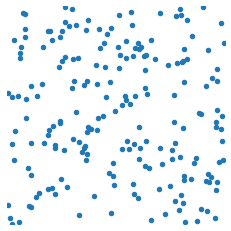

In [118]:
ax = rset.plot.scatter('x', 'y')
ax.set_axis_off()
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')
plt.savefig('random_distribution.png')

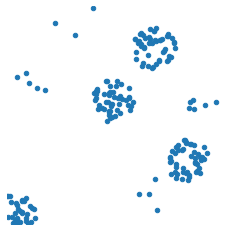

In [114]:
ax = cset.plot.scatter('x', 'y')
ax.set_axis_off()
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')
plt.savefig('clustered_distribution.png')